In [192]:
import numpy as np
import symforce

symforce.set_backend("sympy")
symforce.set_log_level("warning")
from symforce.notebook_util import display, print_expression_tree

from symforce import sympy as sm
from symforce import geo
from symforce import typing as T
from symforce.opt.factor import Factor
from symforce.opt.optimizer import Optimizer
from symforce.values import Values

from symforce.opt.barrier_functions import (
    min_max_power_barrier,
    min_max_linear_barrier,
    max_linear_barrier
)

import numpy as np
import matplotlib.pyplot as plt

v:
a_0*t + s_5*t**5 + s_6*t**6 + v_0 + t**2*(-18*T_A**7*s_6 - 7*T_A**6*s_5 - 63*T_A**2*a_0 + 21*T_A**2*a_A - 252*T_A*v_0 - 168*T_A*v_A + 420*l_A)/(14*T_A**3) + t**3*(32*T_A**7*s_6 + 14*T_A**6*s_5 + 42*T_A**2*a_0 - 28*T_A**2*a_A + 224*T_A*v_0 + 196*T_A*v_A - 420*l_A)/(7*T_A**4) + t**4*(-60*T_A**7*s_6 - 35*T_A**6*s_5 - 35*T_A**2*a_0 + 35*T_A**2*a_A - 210*T_A*v_0 - 210*T_A*v_A + 420*l_A)/(14*T_A**5)
a:
a_0 + 5*s_5*t**4 + 6*s_6*t**5 + t*(-18*T_A**7*s_6 - 7*T_A**6*s_5 - 63*T_A**2*a_0 + 21*T_A**2*a_A - 252*T_A*v_0 - 168*T_A*v_A + 420*l_A)/(7*T_A**3) + 3*t**2*(32*T_A**7*s_6 + 14*T_A**6*s_5 + 42*T_A**2*a_0 - 28*T_A**2*a_A + 224*T_A*v_0 + 196*T_A*v_A - 420*l_A)/(7*T_A**4) + 2*t**3*(-60*T_A**7*s_6 - 35*T_A**6*s_5 - 35*T_A**2*a_0 + 35*T_A**2*a_A - 210*T_A*v_0 - 210*T_A*v_A + 420*l_A)/(7*T_A**5)


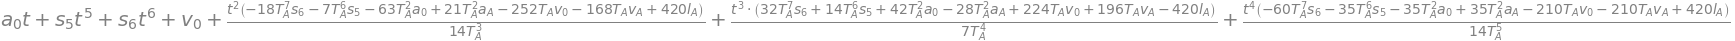

In [193]:
t = sm.Symbol("t")
T_a = sm.Symbol("T_A")
v_0 = sm.Symbol("v_0")
a_0 = sm.Symbol("a_0")
v_A = sm.Symbol("v_A")
a_A = sm.Symbol("a_A")
l_a = sm.Symbol("l_A")

polynomial_order = 6
coeffs = [sm.Symbol("s_{}".format(i)) for i in range(1, polynomial_order+1)]

def velocity_function(current_time):
    v_t = v_0
    for i in range(1, polynomial_order+1):
        v_t = v_t + coeffs[i-1] * current_time**i
    return v_t

def acc_function(current_time):
    tmp = sm.Symbol("tmp")
    return sm.diff(velocity_function(tmp), tmp).subs(tmp, current_time)

eq1 = sm.Eq(velocity_function(0), v_0)
eq2 = sm.Eq(velocity_function(T_a), v_A)
eq3 = sm.Eq(acc_function(0), a_0)
eq4 = sm.Eq(acc_function(T_a), a_A)
tmp = sm.Symbol("tmp")
eq5 = sm.Eq(sm.integrate(velocity_function(tmp), (tmp, 0, T_a)), l_a)

sol = sm.solve([eq1, eq2, eq3, eq4, eq5], coeffs[:4])

def sol_velocity_function_raw(current_time):
    return velocity_function(current_time).subs([(coeffs[0], sol[coeffs[0]]),
                                                 (coeffs[1], sol[coeffs[1]]),
                                                 (coeffs[2], sol[coeffs[2]]),
                                                 (coeffs[3], sol[coeffs[3]]),
                                                 ])

def sol_velocity_function(current_time, arrival_time, initial_v, initial_a, arrival_v, arrival_a, drive_length):
    return sol_velocity_function_raw(current_time).subs([
        (v_0, initial_v),
        (a_0, initial_a),
        (v_A, arrival_v),
        (a_A, arrival_a),
        (T_a, arrival_time),
        (l_a, drive_length)
    ])

print("v:")
print(sol_velocity_function_raw(t))

print("a:")
print(sm.diff(sol_velocity_function_raw(t), t))

sol_velocity_function_raw(t)

In [194]:
def velocity_function(t: T.Scalar,
                      v_0: T.Scalar,
                      a_0: T.Scalar,
                      v_A: T.Scalar,
                      a_A: T.Scalar,
                      T_A: T.Scalar,
                      l_A: T.Scalar,
                      s_5: T.Scalar,
                      s_6: T.Scalar) -> T.Scalar :
    return a_0*t + s_5*t**5 + s_6*t**6 + v_0 + t**2*(-18*T_A**7*s_6 - 7*T_A**6*s_5 - 63*T_A**2*a_0 + 21*T_A**2*a_A - 252*T_A*v_0 - 168*T_A*v_A + 420*l_A)/(14*T_A**3) + t**3*(32*T_A**7*s_6 + 14*T_A**6*s_5 + 42*T_A**2*a_0 - 28*T_A**2*a_A + 224*T_A*v_0 + 196*T_A*v_A - 420*l_A)/(7*T_A**4) + t**4*(-60*T_A**7*s_6 - 35*T_A**6*s_5 - 35*T_A**2*a_0 + 35*T_A**2*a_A - 210*T_A*v_0 - 210*T_A*v_A + 420*l_A)/(14*T_A**5)

def acc_function(t: T.Scalar,
                      v_0: T.Scalar,
                      a_0: T.Scalar,
                      v_A: T.Scalar,
                      a_A: T.Scalar,
                      T_A: T.Scalar,
                      l_A: T.Scalar,
                      s_5: T.Scalar,
                      s_6: T.Scalar) -> T.Scalar :
    return a_0 + 5*s_5*t**4 + 6*s_6*t**5 + t*(-18*T_A**7*s_6 - 7*T_A**6*s_5 - 63*T_A**2*a_0 + 21*T_A**2*a_A - 252*T_A*v_0 - 168*T_A*v_A + 420*l_A)/(7*T_A**3) + 3*t**2*(32*T_A**7*s_6 + 14*T_A**6*s_5 + 42*T_A**2*a_0 - 28*T_A**2*a_A + 224*T_A*v_0 + 196*T_A*v_A - 420*l_A)/(7*T_A**4) + 2*t**3*(-60*T_A**7*s_6 - 35*T_A**6*s_5 - 35*T_A**2*a_0 + 35*T_A**2*a_A - 210*T_A*v_0 - 210*T_A*v_A + 420*l_A)/(7*T_A**5)


In [195]:
def velocity_min_max_residual(t: T.Scalar,
                              v_0: T.Scalar,
                              a_0: T.Scalar,
                              v_A: T.Scalar,
                              a_A: T.Scalar,
                              T_A: T.Scalar,
                              l_A: T.Scalar,
                              s_5: T.Scalar,
                              s_6: T.Scalar) -> geo.V1 :
    return geo.V1(
        min_max_linear_barrier(velocity_function(t, v_0, a_0, v_A, a_A, T_A, l_A, s_5, s_6), 0, v_0, 10000, 0.1)
    )

def acc_residual(t: T.Scalar,
    v_0: T.Scalar,
    a_0: T.Scalar,
    v_A: T.Scalar,
    a_A: T.Scalar,
    T_A: T.Scalar,
    l_A: T.Scalar,
    s_5: T.Scalar,
    s_6: T.Scalar) -> geo.V1 :
    return geo.V1(
        max_linear_barrier(acc_function(t, v_0, a_0, v_A, a_A, T_A, l_A, s_5, s_6), -0.5, 100, 0.1)
    )


In [196]:
factors = []

num_constraint = 20
for i in range(num_constraint):
    # factors.append(
    #     Factor(
    #         # residual=velocity_min_max_residual,
    #         residual=acc_residual,
    #         keys=["times[{}]".format(i),
    #               "v_0", "a_0",
    #               "v_A", "a_A",
    #               "T_A", "l_A", "s_5", "s_6"],
    #     )
    # )

    factors.append(
        Factor(
            residual=velocity_min_max_residual,
            # residual=acc_residual,
            keys=["times[{}]".format(i),
                  "v_0", "a_0",
                  "v_A", "a_A",
                  "T_A", "l_A", "s_5", "s_6"],
        )
    )

In [197]:
optimizer = Optimizer(
    factors=factors,
    optimized_keys=["s_5", "s_6"],
    debug_stats=True,
)

In [198]:
# initial_speed = 1.38
# initial_a = -1.0
# arrival_speed = 0
# arrival_a = -0.1 * 9.8
# drive_length = 20
# arrival_time = 20

initial_speed = 1.8
initial_a = -0.05 * 9.8
arrival_speed = 0
arrival_a = -0.05 * 9.8
drive_length = 20
arrival_time = 30

initial_values = Values(
    times = list(np.linspace(1, arrival_time-1, num_constraint)),
    v_0 = initial_speed,
    a_0 = initial_a,
    v_A = arrival_speed,
    a_A = arrival_a,
    T_A = arrival_time,
    l_A = drive_length,
    s_5 = 0,
    s_6 = 0
)

result = optimizer.optimize(initial_values)
print(result)

Optimizer.Result(initial_values=Values(
  times: [1.0, 2.473684210526316, 3.9473684210526314, 5.421052631578947, 6.894736842105263, 8.368421052631579, 9.842105263157894, 11.31578947368421, 12.789473684210526, 14.26315789473684, 15.736842105263158, 17.210526315789473, 18.684210526315788, 20.157894736842103, 21.63157894736842, 23.105263157894736, 24.57894736842105, 26.052631578947366, 27.52631578947368, 29.0],
  v_0: 1.8,
  a_0: -0.49000000000000005,
  v_A: 0,
  a_A: -0.49000000000000005,
  T_A: 30,
  l_A: 20,
  s_5: 0,
  s_6: 0,
), optimized_values=Values(
  times: [1.0, 2.473684210526316, 3.9473684210526314, 5.421052631578947, 6.894736842105263, 8.368421052631579, 9.842105263157894, 11.31578947368421, 12.789473684210526, 14.26315789473684, 15.736842105263158, 17.210526315789473, 18.684210526315788, 20.157894736842103, 21.63157894736842, 23.105263157894736, 24.57894736842105, 26.052631578947366, 27.52631578947368, 29.0],
  v_0: 1.8,
  a_0: -0.49000000000000005,
  v_A: 0.0,
  a_A: -0.490

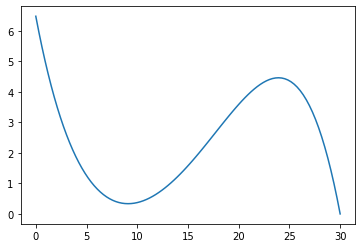

In [199]:
opt_s_5  = result.optimized_values["s_5"]
opt_s_6 = result.optimized_values["s_6"]


opt_t = np.linspace(0, arrival_time, 100)
opt_v = [3600/1000 * velocity_function(c_t, initial_speed, initial_a, arrival_speed, arrival_a, arrival_time, drive_length, opt_s_5, opt_s_6) for c_t in opt_t]

# plt.ylim([0, initial_speed])
plt.plot(opt_t, opt_v)
